In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Write a program to compute the first-order gradients of an image in the x and y directions using Sobel filters. Combine the gradients to visualize edges.

In [78]:
img = cv2.imread('dog.jpg')

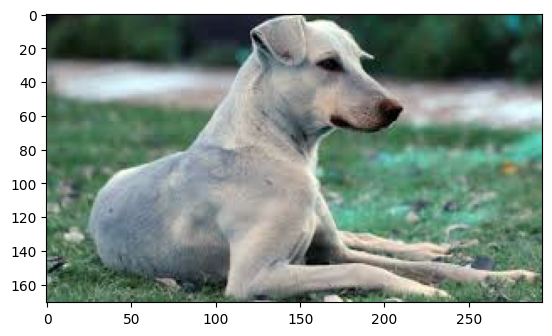

In [79]:
# Display the image
plt.imshow(img)
plt.show()

In [80]:
# Convert from BGR to RGB for proper color display
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [81]:
image.shape

(171, 294, 3)

In [82]:
# Apply Sobel filters to calculate gradients in the x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

In [83]:
type(sobel_x)

numpy.ndarray

In [84]:
sobel_x.shape

(171, 294, 3)

In [85]:
sobel_x.max()

770.0

In [86]:
sobel_x.min()

-736.0

In [87]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
# Normalize to 0-255
#gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

In [88]:
gradient_magnitude.shape

(171, 294, 3)

In [89]:
gradient_magnitude.max()

884.4715936648277

In [90]:
gradient_magnitude.min()

0.0

In [91]:
# Normalize Sobel outputs to 0-255 for display
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

In [92]:
print(sobel_x_display.max())
print(sobel_x_display.min())
print(sobel_x_display.shape)

255
0
(171, 294, 3)


In [93]:
print(gradient_magnitude_display.max())
print(gradient_magnitude_display.min())
print(gradient_magnitude_display.shape)

254
0
(171, 294, 3)


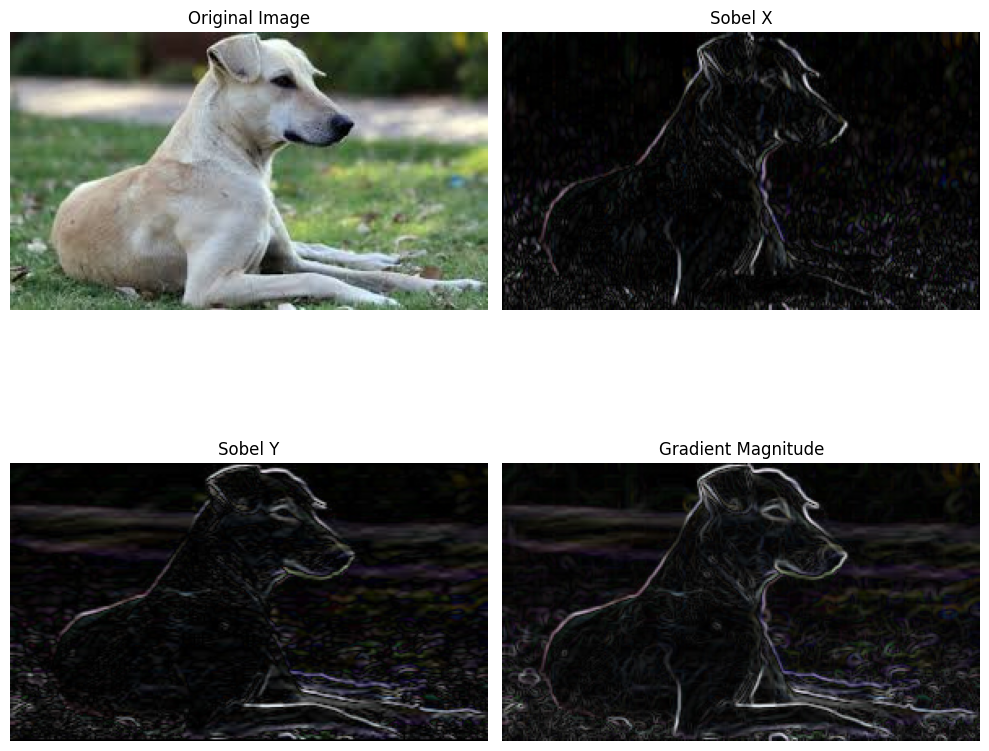

In [94]:
# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Write a program to compute second-order gradients using the Laplacian operator. o

In [95]:

# Load the image
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

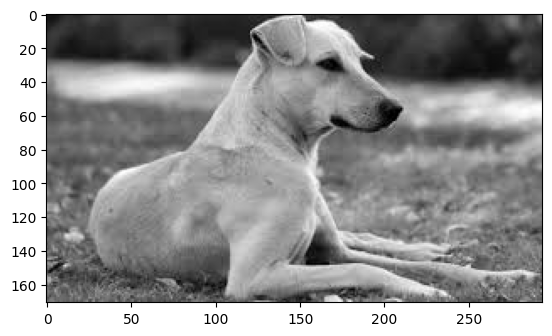

In [96]:
plt.imshow(image, cmap='gray')  # Specify the color map as 'gray'
plt.show()

In [97]:
# Compute the Laplacian (second-order gradients)
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

# Normalize the Laplacian for better visualization
laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for display
laplacian_uint8 = laplacian_normalized.astype(np.uint8)

In [98]:
laplacian.shape

(171, 294)

In [99]:
laplacian_normalized.shape

(171, 294)

In [100]:
laplacian_uint8.shape

(171, 294)

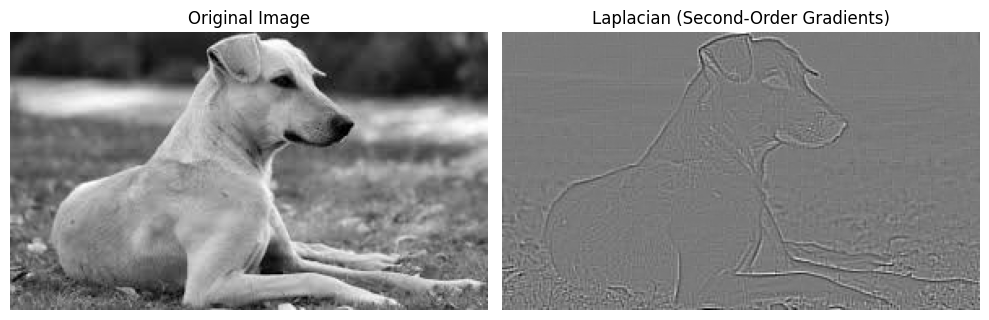

In [101]:


# Display the original image and the Laplacian
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Laplacian (Second-Order Gradients)")
plt.imshow(laplacian_uint8, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [102]:
# sobel filter for detecting verticle and horizontal edges,/
# also do so using canny filter /
# explore and use laplacian filter, /
# explore and use haris corner detector/
# explore and use sift/
# apply various filter bank to detect texture in the image/
# assuming that your task is to classify image in 3 classes (dog, cat, horse etc) extract feature from the image using various feature extraction process/

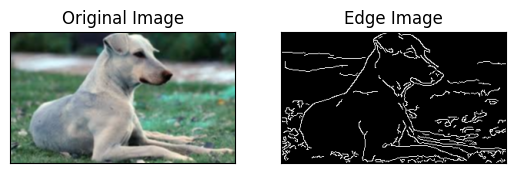

In [116]:
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv2.Canny(img,100,200,apertureSize=3)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

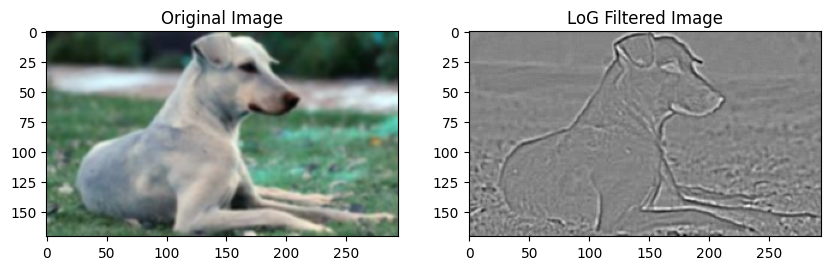

In [119]:
image = cv2.GaussianBlur(img, (3, 3), 0)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=3)
# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('LoG Filtered Image')

plt.show()

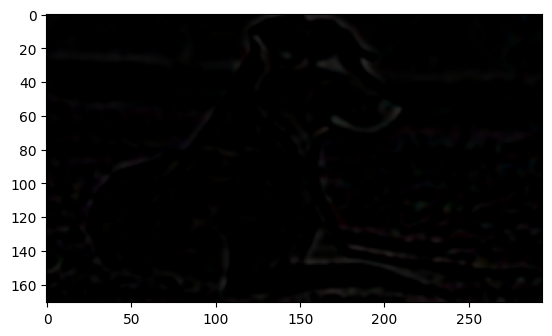

In [121]:
def LoG_filter_opencv(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution using OpenCV filter2D
    result = cv2.filter2D(img, -1, kernel)

    return result

sigma = 2.0
filtered_image = LoG_filter_opencv(img, sigma)
filtered_image = cv2.convertScaleAbs(filtered_image)
plt.imshow(filtered_image, cmap="gray")

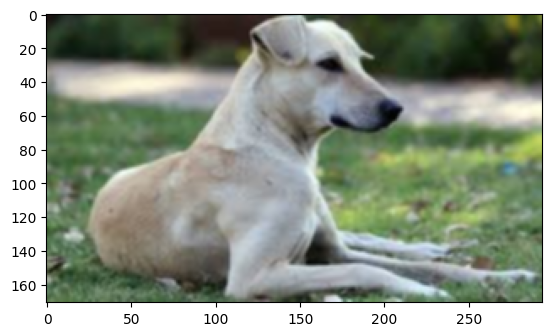

In [123]:
# Make a copy of the image
image_copy = np.copy(img)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

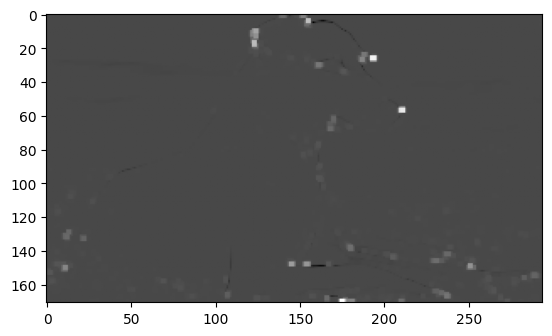

In [124]:

# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


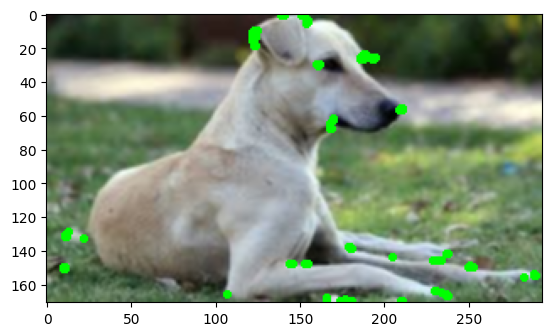

In [125]:

# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

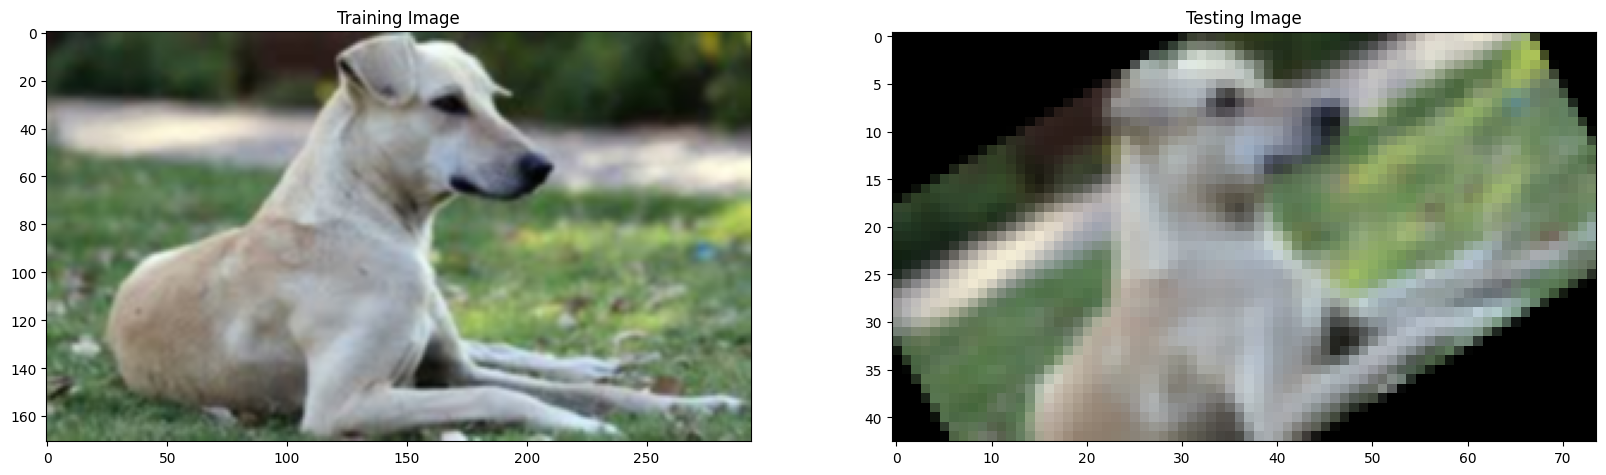

In [126]:
image1 = np.copy(img)
# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)


Number of Keypoints Detected In The Training Image:  305
Number of Keypoints Detected In The Query Image:  42


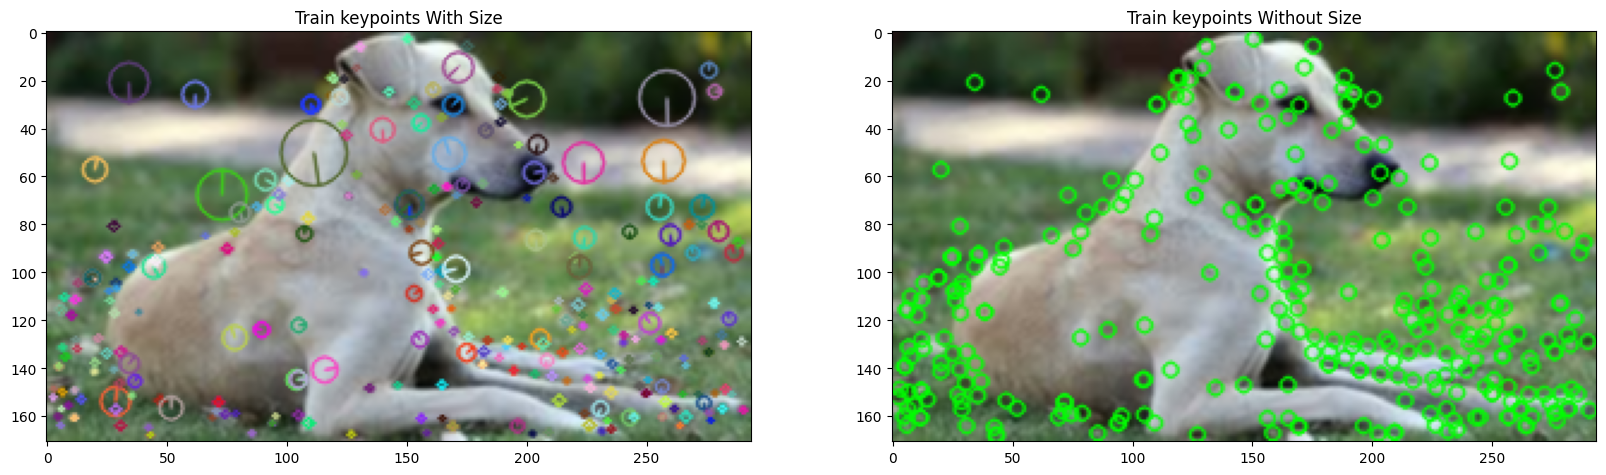

In [130]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: brick
original: brick, rotated: 70deg, match result: brick
original: grass, rotated: 145deg, match result: brick


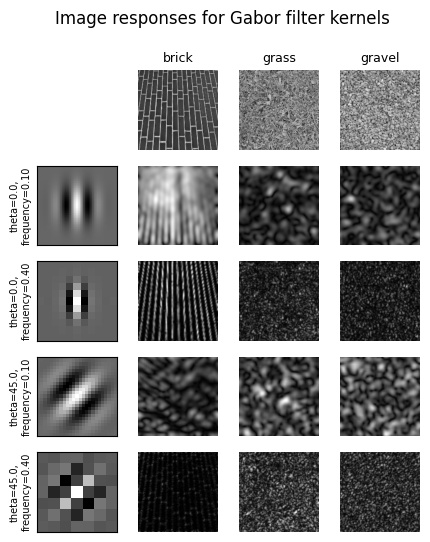

In [131]:
image = np.copy(img)
from scipy import ndimage as ndi

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :]) ** 2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4.0 * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(
                gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma)
            )
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
brick = img_as_float(data.brick())[shrink]
grass = img_as_float(data.grass())[shrink]
gravel = img_as_float(data.gravel())[shrink]
image_names = ('brick', 'grass', 'gravel')
images = (brick, grass, gravel)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(gravel, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(ndi.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(
        ndi.convolve(image, np.real(kernel), mode='wrap') ** 2
        + ndi.convolve(image, np.imag(kernel), mode='wrap') ** 2
    )


# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4.0 * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = f"theta={theta * 180 / np.pi},\nfrequency={frequency:.2f}"
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel))
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

In [135]:

def extract_sift_features(img):
    if img is None:
        print("Error: Input image is None.")
        return None, None

    if len(img.shape) == 2:  # If already grayscale
        gray = img
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    sift = cv2.SIFT_create()
    keypoints,descriptors = sift.detectAndCompute(gray, None)

    if descriptors is None:
        print("No keypoints detected.")
        return keypoints, None

    return keypoints, descriptors
img = cv2.imread('dog.jpg')
keypoints,descriptors = extract_sift_features(img)

if descriptors is not None:
    print("SIFT descriptors shape:", descriptors.shape)
else:
    print("No descriptors found.")

SIFT descriptors shape: (343, 128)
